Dataset Loaded Successfully

   Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0   1  1360         5          4       3       1970  Downtown  Excellent   
1   2  4272         5          4       3       1958  Downtown  Excellent   
2   3  3592         2          2       3       1938  Downtown       Good   
3   4   966         4          2       2       1902  Suburban       Fair   
4   5  4926         1          4       2       1975  Downtown       Fair   

  Garage   Price  
0     No  149919  
1     No  424998  
2     No  266746  
3    Yes  244020  
4    Yes  636056  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   

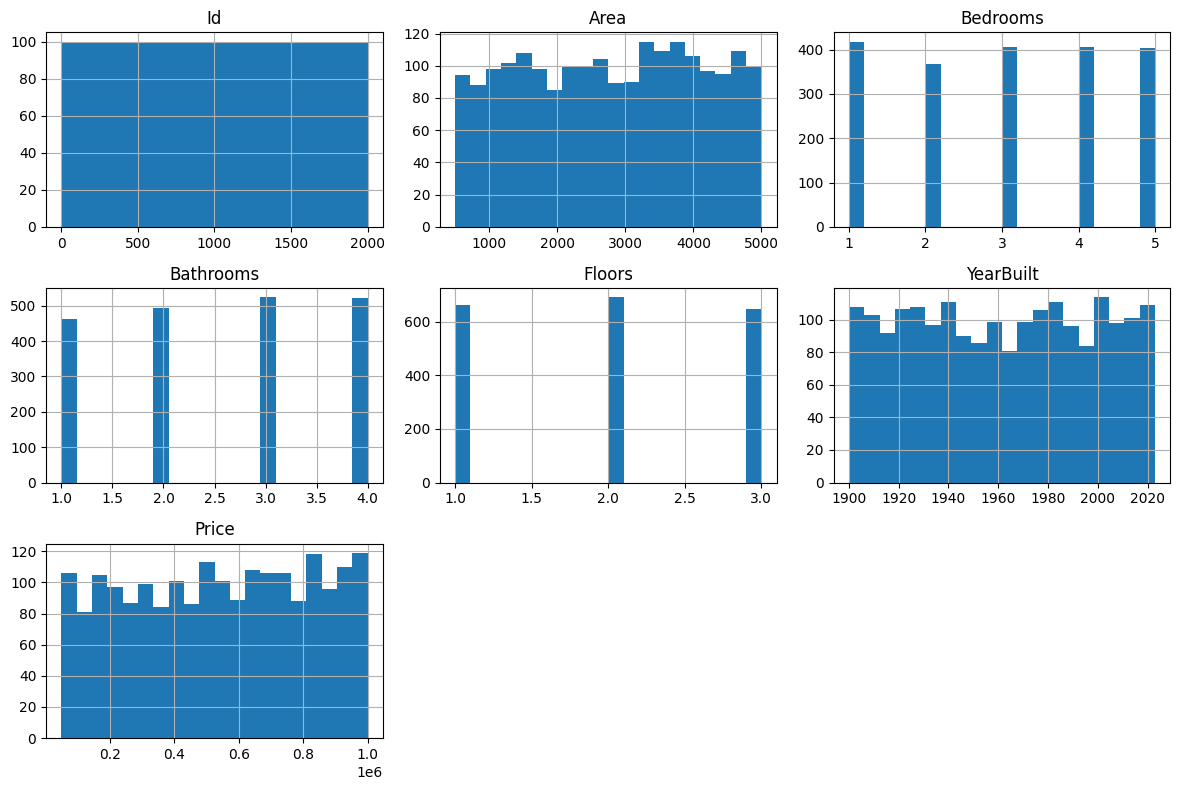

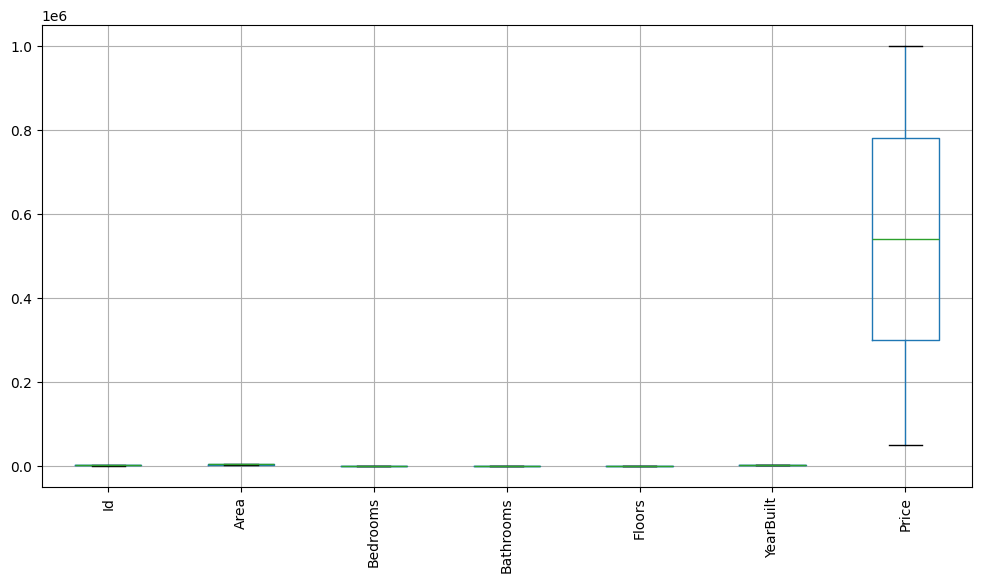

ValueError: could not convert string to float: 'Downtown'

<Figure size 1000x600 with 0 Axes>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv("House Price Prediction Dataset.csv")
print("Dataset Loaded Successfully\n")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nChecking Missing Values:")
print(df.isnull().sum())

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

df = df.drop_duplicates()

print("\nStatistical Summary:")
print(df.describe())

df.hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
df.boxplot()
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

target = "Price"
corr_values = df.corr()[target].sort_values(ascending=False)
print("\nCorrelation with Price:")
print(corr_values)

features = corr_values.index[1:6].tolist()
print("\nSelected Features:", features)


X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Results:")
print("MAE  :", mae)
print("MSE  :", mse)
print("RMSE :", rmse)
print("R² Score:", r2)

print("\nModel Coefficients:")
for col, coef in zip(features, model.coef_):
    print(col, ":", coef)

print("\nTraining Completed Successfully!")

